<a href="https://colab.research.google.com/github/Tamizh2907/Projectcolor/blob/main/projectcolor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

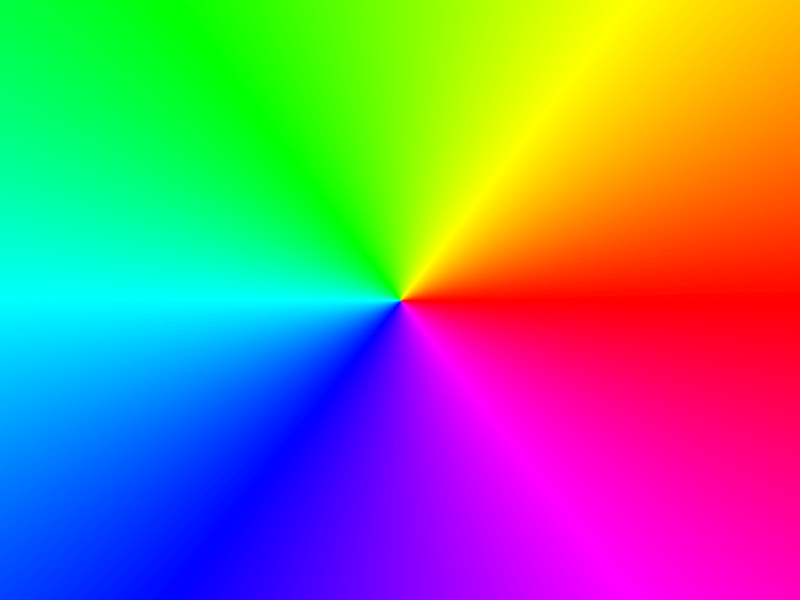

Detected Color (RGB): [  0 200 249], Closest Color Name: Dark Turquoise, Hex Code: #00c8f9
Detected Color (RGB): [ 47 255   7], Closest Color Name: Lime, Hex Code: #2fff07
Detected Color (RGB): [212   0 236], Closest Color Name: Magenta, Hex Code: #d400ec
Detected Color (RGB): [255   7  48], Closest Color Name: Crimson, Hex Code: #ff0730
Detected Color (RGB): [211 242   0], Closest Color Name: Yellow, Hex Code: #d3f200
Detected Color (RGB): [254 107   0], Closest Color Name: Dark Orange, Hex Code: #fe6b00
Detected Color (RGB): [ 33  27 254], Closest Color Name: Blue, Hex Code: #211bfe
Detected Color (RGB): [  0 254 129], Closest Color Name: Dark Turquoise, Hex Code: #00fe81


In [108]:
import cv2
import numpy as np
from scipy.spatial import distance
from google.colab.patches import cv2_imshow

# Load the input image
image = cv2.imread('/content/phaseportrait.png')

# Preprocess the image (e.g., resize, convert to RGB)
# Example preprocessing steps: resizing and converting to RGB
image = cv2.resize(image, (800, 600))  # Resize the image
# image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
cv2_imshow(image)

# Reshape the image to a 2D array of pixels
pixels = image.reshape((-1, 3))

# Convert pixel values to float32
pixels = np.float32(pixels)

# Define criteria and apply K-means clustering
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
num_clusters = 8
_, labels, centers = cv2.kmeans(pixels, num_clusters, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# Convert centers to uint8 and reshape back to image format
centers = np.uint8(centers)
segmented_image = centers[labels.flatten()]
segmented_image = segmented_image.reshape(image.shape)

# Display the segmented image
# cv2_imshow(segmented_image)
# cv2.waitKey(0)

# Function to find the closest color name based on hexadecimal color code
def closest_color_rgb(rgb_code):
    min_distance = float('inf')
    closest_color_name = None
    for color_name, color_rgb in color_names_rgb.items():
        d = distance.euclidean(rgb_code, color_rgb)
        if d < min_distance:
            min_distance = d
            closest_color_name = color_name
    return closest_color_name

# Function to convert RGB values to hexadecimal color code
def rgb_to_hex(rgb_code):
    return '#{0:02x}{1:02x}{2:02x}'.format(rgb_code[0], rgb_code[1], rgb_code[2])

# Define a list of color names and their corresponding RGB values
# Define a dictionary of color names and their corresponding RGB values
color_names_rgb = {
    'Red': (255, 0, 0),
    'Green': (0, 128, 0),
    'Blue': (0, 0, 255),
    'Yellow': (255, 255, 0),
    'Cyan': (0, 255, 255),
    'Magenta': (255, 0, 255),
    'Orange': (255, 165, 0),
    'Purple': (128, 0, 128),
    'Brown': (165, 42, 42),
    'Pink': (255, 192, 203),
    'Teal': (0, 128, 128),
    'Lime': (0, 255, 0),
    'Olive': (128, 128, 0),
    'Maroon': (128, 0, 0),
    'Black': (0, 0, 0),
    'White': (255, 255, 255),
    'Gold': (255, 215, 0),
    'Silver': (192, 192, 192),
    'Gray': (128, 128, 128),
    'Navy': (0, 0, 128),
    'Sky Blue': (135, 206, 235),
    'Turquoise': (64, 224, 208),
    'Violet': (238, 130, 238),
    'Crimson': (220, 20, 60),
    'Lavender': (230, 230, 250),
    'Indigo': (75, 0, 130),
    'Beige': (245, 245, 220),
    'Salmon': (250, 128, 114),
    'Khaki': (240, 230, 140),
    'Tomato': (255, 99, 71),
    'Slate Gray': (112, 128, 144),
    'Chocolate': (210, 105, 30),
    'Ivory': (255, 255, 240),
    'Peru': (205, 133, 63),
    'Sienna': (160, 82, 45),
    'Coral': (255, 127, 80),
    'Dark Green': (0, 100, 0),
    'Dark Blue': (0, 0, 139),
    'Dark Red': (139, 0, 0),
    'Dark Orange': (255, 140, 0),
    'Dark Violet': (148, 0, 211),
    'Dark Magenta': (139, 0, 139),
    'Dark Cyan': (0, 139, 139),
    'Dark Gray': (169, 169, 169),
    'Dark Salmon': (233, 150, 122),
    'Dark Khaki': (189, 183, 107),
    'Dark Turquoise': (0, 206, 209),
    'Dark Slate Gray': (47, 79, 79),
    'Light Green': (144, 238, 144),
    'Light Blue': (173, 216, 230),
    'Light Red': (255, 182, 193),
    'Light Orange': (255, 160, 122),
    'Light Violet': (221, 160, 221),
    'Light Magenta': (255, 0, 255),
    'Light Cyan': (224, 255, 255),
    'Light Gray': (211, 211, 211),
    'Light Salmon': (255, 160, 122),
    'Light Khaki': (240, 230, 140),
    'Light Turquoise': (175, 238, 238),
    'Light Slate Gray': (119, 136, 153),
}


# Extract RGB codes of the detected colors and their corresponding color names
for center in centers:
    rgb_code = center
    closest_name = closest_color_rgb(rgb_code)
    hex_code = rgb_to_hex(rgb_code)
    print(f'Detected Color (RGB): {rgb_code}, Closest Color Name: {closest_name}, Hex Code: {hex_code}')